In [87]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier 
from sklearn import  neighbors
from scipy.stats import normaltest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

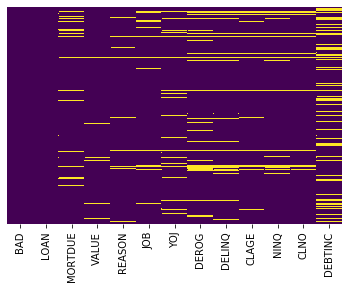

In [5]:
data = pd.read_csv("data/Bank_of_America_data.csv")
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')


REASON, JOB, DEROG, DELINQ

In [6]:
df = data.copy(deep=True)


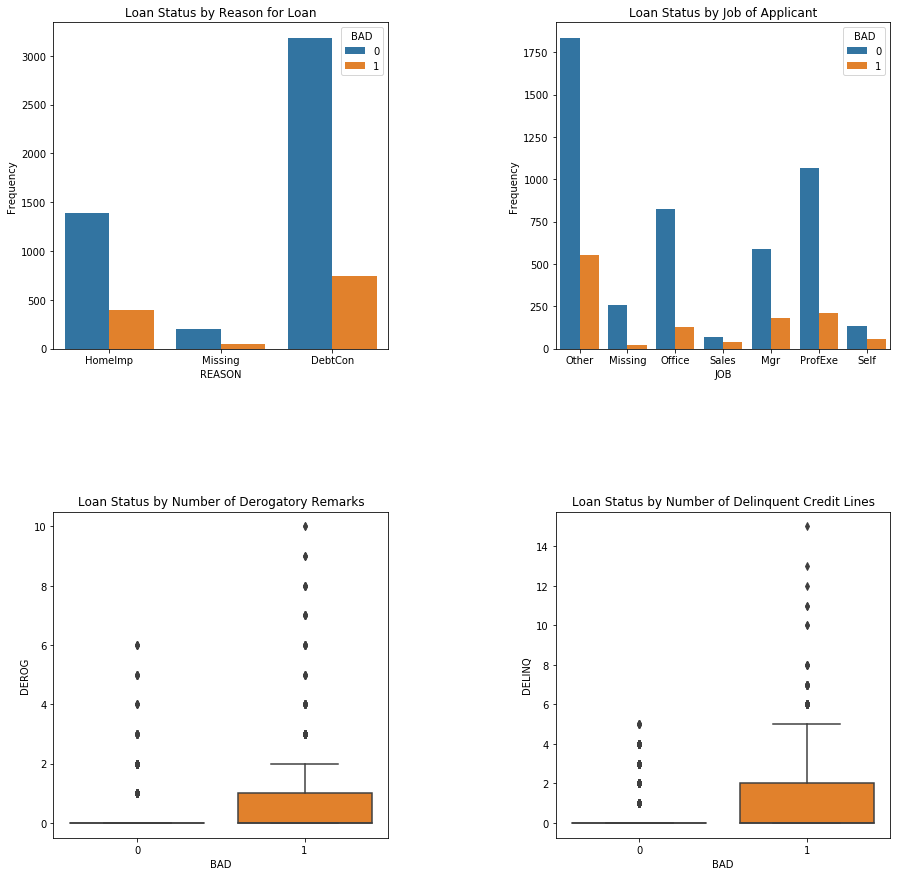

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
x = df.REASON.copy()
x[pd.isnull(x)==True] = 'Missing'
sns.countplot(x, hue = df.BAD)
plt.title('Loan Status by Reason for Loan')
plt.xlabel('REASON')
plt.ylabel('Frequency')
plt.subplot(2,2,2)
x = df.JOB.copy()
x[pd.isnull(x)==True] = 'Missing'
sns.countplot(x, hue=df.BAD)
plt.title('Loan Status by Job of Applicant')
plt.ylabel('Frequency')
plt.xlabel('JOB')
plt.subplot(2,2,3)
sns.boxplot(y=df.DEROG, x=df.BAD)
plt.title('Loan Status by Number of Derogatory Remarks')
plt.xlabel('BAD')
plt.ylabel('DEROG')
plt.subplot(2,2,4)
sns.boxplot(y=df.DELINQ, x=df.BAD)
plt.title('Loan Status by Number of Delinquent Credit Lines')
plt.xlabel('BAD')
plt.ylabel('DELINQ')
plt.subplots_adjust(hspace=.5, wspace = .5)
plt.show()


Most loans are for debt consolidation rather than home improvement. A small amount of values are missing. The ratios of BAD seems to vary by reason, indicating a possible predictor. Most persons seeking loans have a job falling under 'other'. The distribution of the target variable seems to vary by job, meaning this could be a potentially relevant predictor. Distribution of DEROG and DELINQ relative to the target variable seem to vary, indicating potentially useful features.



# DATA Cleaning and imputation

In [8]:
df.shape

(5960, 13)

In [9]:
df = data.dropna(thresh = 11)


In [10]:
df.shape

(5402, 13)

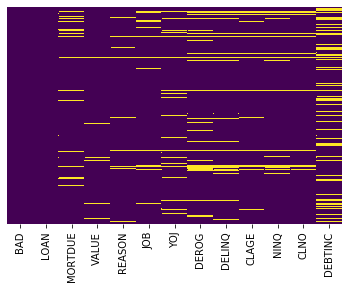

In [11]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')



<h3>DEBTINC</h3>

check if average DEBTINC varies based on another categorical feature, REASON.

In [12]:
print(np.mean(df.loc[df.JOB == 'Other','VALUE']))
print(np.mean(df.loc[df.JOB == 'Office','VALUE']))
print(np.mean(df.loc[df.JOB == 'Mgr','VALUE']))
print(np.mean(df.loc[df.JOB == 'Sales','VALUE']))
print(np.mean(df.loc[df.JOB == 'ProfExe','VALUE']))
print(np.mean(df.loc[df.JOB == 'Self','VALUE']))
print(np.mean(df.loc[pd.isnull(df.JOB) == True,'VALUE']))


86820.60494598403
94583.94620111733
109084.24066187048
108014.54205607477
131633.87591836735
149346.89130434784
89303.3469387755


vary a lot, especially for missing/non-missing values of REASON. Let's impute these means.

In [13]:
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     270
VALUE        69
REASON      116
JOB          98
YOJ         286
DEROG       267
DELINQ      127
CLAGE        60
NINQ         79
CLNO          0
DEBTINC    1115
dtype: int64

In [14]:
df.loc[(df.JOB == 'Other') & (pd.isnull(df.VALUE) == True),'VALUE'] = np.mean(df.loc[df.JOB == 'Other','VALUE'])
df.loc[(df.JOB == 'Office') & (pd.isnull(df.VALUE) == True),'VALUE'] = np.mean(df.loc[df.JOB == 'Office','VALUE'])
df.loc[(df.JOB == 'Mgr') & (pd.isnull(df.VALUE) == True),'VALUE'] = np.mean(df.loc[df.JOB == 'Mgr','VALUE'])
df.loc[(df.JOB == 'Sales') & (pd.isnull(df.VALUE) == True),'VALUE'] = np.mean(df.loc[df.JOB == 'Sales','VALUE'])
df.loc[(df.JOB == 'ProfExe') & (pd.isnull(df.VALUE) == True),'VALUE'] = np.mean(df.loc[df.JOB == 'ProfExe','VALUE'])
df.loc[(df.JOB == 'Self') & (pd.isnull(df.VALUE) == True),'VALUE'] = np.mean(df.loc[df.JOB == 'Self','VALUE'])

df.loc[(pd.isnull(df.JOB) == True) & (pd.isnull(df.VALUE) == True),'VALUE'] = np.mean(df.loc[pd.isnull(df.JOB) == True,'VALUE'])

/Users/devon/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
t = df.copy(deep=True)
#t = t.dropna()



The mode was simply imputed for VALUE, and missing values were given their own category for JOB.



In [16]:
t.isna().sum()

BAD           0
LOAN          0
MORTDUE     270
VALUE         0
REASON      116
JOB          98
YOJ         286
DEROG       267
DELINQ      127
CLAGE        60
NINQ         79
CLNO          0
DEBTINC    1115
dtype: int64

<h1>MORTDUE</h1>

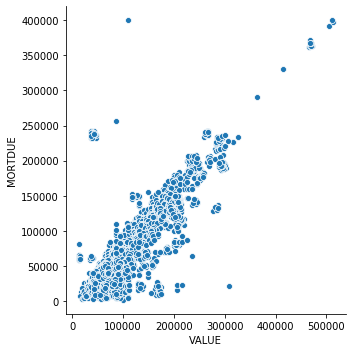

In [17]:
sns.relplot(x="VALUE", y="MORTDUE", data=t);


Linear Regression can be applicated here

In [18]:
t.isna().sum()

BAD           0
LOAN          0
MORTDUE     270
VALUE         0
REASON      116
JOB          98
YOJ         286
DEROG       267
DELINQ      127
CLAGE        60
NINQ         79
CLNO          0
DEBTINC    1115
dtype: int64

In [19]:
data_no_NaN = t[['VALUE','MORTDUE']].dropna()
#scaling.fit_transform(data_no_NaN)

X=np.array(data_no_NaN['VALUE']).reshape(-1, 1)
y=np.array(data_no_NaN['MORTDUE']).reshape(-1, 1)
#X = scaling.fit_transform(X)
#y = scaling.fit_transform(y)

#scaling = StandardScaler()



In [20]:

reg = LinearRegression().fit(X, y)

In [21]:
reg.score(X, y)

0.7467222624988558

In [22]:
missing = t[t['MORTDUE'].isnull()]
missing['VALUE'].count()
y_predictions = reg.predict(X)
oppa = reg.predict(missing[['VALUE']])
t.loc[t['MORTDUE'].isna(), 'MORTDUE'] = oppa



In [23]:
t.isna().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON      116
JOB          98
YOJ         286
DEROG       267
DELINQ      127
CLAGE        60
NINQ         79
CLNO          0
DEBTINC    1115
dtype: int64

<h1>CLAGE</h1>

In [24]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=100, random_state=210)

In [25]:
imp = IterativeImputer(max_iter=10, random_state=0)
train = t[['CLAGE','BAD','LOAN','VALUE','CLNO']].dropna()
test = t[t['CLAGE'].isnull()]
test = test[['CLAGE','BAD','LOAN','VALUE','CLNO']]
test.shape
imp.fit(train)
holla = imp.transform(test);
type(holla)
t.loc[t['CLAGE'].isna(), 'CLAGE'] = holla[:,0]


In [26]:
df2 = t.copy(deep=True)

In [27]:
df2.isna().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON      116
JOB          98
YOJ         286
DEROG       267
DELINQ      127
CLAGE         0
NINQ         79
CLNO          0
DEBTINC    1115
dtype: int64

# JOB

## here we are going to use the NaN values like information

In [28]:
df2.loc[pd.isnull(df2.JOB)==True, 'JOB'] = 'Missing'
df2.isna().sum()

BAD           0
LOAN          0
MORTDUE       0
VALUE         0
REASON      116
JOB           0
YOJ         286
DEROG       267
DELINQ      127
CLAGE         0
NINQ         79
CLNO          0
DEBTINC    1115
dtype: int64

In [29]:
#dropping NaN values
y1=df2['BAD']
#encoding categorical variables 
encode_job = ce.OneHotEncoder(cols=['JOB'], return_df=True, use_cat_names=True)

# creating the encoding_pipeline
encoding_steps = [('encoding_job', encode_job)]
encoding_pipeline = Pipeline(encoding_steps)

# encoding categoriacal variables
data_test1 = encoding_pipeline.fit_transform(df2,y1).drop(columns = ["JOB_Missing"])


In [30]:
t = data_test1.copy(deep=True)

In [31]:
data_test1.isna().sum()


BAD               0
LOAN              0
MORTDUE           0
VALUE             0
REASON          116
JOB_Other         0
JOB_Office        0
JOB_Sales         0
JOB_Mgr           0
JOB_ProfExe       0
JOB_Self          0
YOJ             286
DEROG           267
DELINQ          127
CLAGE             0
NINQ             79
CLNO              0
DEBTINC        1115
dtype: int64

# REASON

### We re gonna try to pridict the REASON with GradientBoostingClassifier

In [32]:
t.replace('HomeImp', 0, inplace= True)
t.replace('DebtCon', 1, inplace= True)



In [33]:
test = t.copy(deep=True)
test.drop(['YOJ','DEROG','NINQ','DEBTINC','DELINQ'],1,inplace = True)


In [34]:
test.isna().sum()

BAD              0
LOAN             0
MORTDUE          0
VALUE            0
REASON         116
JOB_Other        0
JOB_Office       0
JOB_Sales        0
JOB_Mgr          0
JOB_ProfExe      0
JOB_Self         0
CLAGE            0
CLNO             0
dtype: int64

In [35]:


data_test33 = test.dropna()
X = np.array(data_test33.drop(['REASON'],1))
y = np.array(data_test33['REASON'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,random_state=20)




from sklearn.ensemble import GradientBoostingClassifier


GB_classifier=GradientBoostingClassifier(n_estimators=200,max_depth=8)
GB_classifier.fit(X_train,y_train)


y_predictions = GB_classifier.predict(X_test)



# Load Accuracy Score
from sklearn.metrics import accuracy_score


print("Accuracy of Model::",accuracy_score(y_test,y_predictions))



Accuracy of Model:: 0.9224952741020794


In [36]:
final = t.copy(deep=True)
final.isna().sum()

BAD               0
LOAN              0
MORTDUE           0
VALUE             0
REASON          116
JOB_Other         0
JOB_Office        0
JOB_Sales         0
JOB_Mgr           0
JOB_ProfExe       0
JOB_Self          0
YOJ             286
DEROG           267
DELINQ          127
CLAGE             0
NINQ             79
CLNO              0
DEBTINC        1115
dtype: int64

In [37]:
miss = test[test['REASON'].isna()]

miss.drop(['REASON'],1,inplace = True)


/Users/devon/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [38]:
nitta = GB_classifier.predict(np.array(miss))
final.loc[final['REASON'].isna(), 'REASON'] = nitta


In [139]:
data_test1 = final.copy(deep=True)


# NINQ
## Iterative Imputer

In [140]:

ninqIT = IterativeImputer(max_iter=100, random_state=34)
ninq = data_test1.drop(['YOJ','DEROG','DELINQ','DEBTINC'],1)
train_ninq = ninq.dropna()
test_ninq = ninq[ninq['NINQ'].isnull()]
ninqIT.fit(train_ninq)
zolla = ninqIT.transform(test_ninq);
data_test1.loc[data_test1['NINQ'].isna(), 'NINQ'] = zolla[:,0]

# DELINQ
## Iterative Imputer

In [141]:
DELINQIT = IterativeImputer(max_iter=100, random_state=34)
DELINQ = data_test1.drop(['YOJ','DEROG','DEBTINC'],1)
train_DELINQ = DELINQ.dropna()
test_DELINQ = DELINQ[DELINQ['DELINQ'].isnull()]
DELINQIT.fit(train_DELINQ)
zolla = DELINQIT.transform(test_DELINQ);
data_test1.loc[data_test1['DELINQ'].isna(), 'DELINQ'] = zolla[:,0]


In [142]:
#data_test1.loc[pd.isnull(data_test1.DELINQ)==True, 'DELINQ'] = 0


# YOJ
## Iterative Imputer

In [143]:

YOJIT = IterativeImputer(max_iter=100, random_state=34)
YOJ = data_test1.drop(['DEROG','DEBTINC'],1)
train_YOJ = YOJ.dropna()
test_YOJ = YOJ[YOJ['YOJ'].isnull()]
YOJIT.fit(train_YOJ)
zolla_YOJ = YOJIT.transform(test_YOJ);
data_test1.loc[data_test1['YOJ'].isna(), 'YOJ'] = zolla_YOJ[:,0]


# DEROG
## Iterative Imputer

In [144]:

DEROGIT = IterativeImputer(max_iter=100, random_state=34)
DEROG = data_test1.drop(['DEBTINC'],1)
train_DEROG = DEROG.dropna()
test_DEROG = DEROG[DEROG['DEROG'].isnull()]
DEROGIT.fit(train_DEROG)
zolla_DEROG = DEROGIT.transform(test_DEROG);
data_test1.loc[data_test1['DEROG'].isna(), 'DEROG'] = zolla_DEROG[:,0]


In [145]:
# CLNO = IterativeImputer(max_iter=10, random_state=0)
# train_CLNO = data_test1.dropna()
# test_CLNO = data_test1[data_test1['CLNO'].isnull()]
# CLNO.fit(train_CLNO)
# zolla_CLNO = CLNO.transform(test_CLNO);
# data_test1.loc[data_test1['CLNO'].isna(), 'CLNO'] = zolla_CLNO[:,0]

# DEROG
## Iterative Imputer

In [146]:
DEBTINC = IterativeImputer(max_iter=100, random_state=34)
train_DEBTINC = data_test1.dropna()
test_DEBTINC = data_test1[data_test1['DEBTINC'].isnull()]
DEBTINC.fit(train_DEBTINC)
zolla_DEBTINC = DEBTINC.transform(test_DEBTINC);
data_test1.loc[data_test1['DEBTINC'].isna(), 'DEBTINC'] = zolla_DEBTINC[:,0]

# TEST GradientBoostingClassifier


### Proportion of lenders(BAD/GOOD) has been changed but not much:


In [147]:
100*sum(data_test1["BAD"]== 1)/ len(data_test1.index)


20.103665309144763

In [148]:
# The origional:
100*sum(data["BAD"] == 1)/ len(data.index)

19.949664429530202

In [149]:
from pandas_profiling import ProfileReport
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.base import BaseEstimator


In [150]:
# X = np.array(data_test1.drop(['BAD'],1))
# y = np.array(data_test1['BAD'])
# X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.25, random_state=122)

In [151]:
class SwitchAlgo(BaseEstimator):
    def __init__(self, estimator):
        self.estimator = estimator
        
    def fit(self, X, y=None):
        self.estimator.fit(X, y)
        return self


    def predict(self, X):
        return self.estimator.predict(X)


    def predict_proba(self, X,y):
        DefaultProba = self.estimator.predict_proba(X)
        prediction = self.predict(X)
        DefaultProba = DefaultProba[:,1]
        result = pd.concat ([pd.DataFrame(DefaultProba, index =X.index ,columns = ["Probability"]),
            pd.DataFrame(prediction, index = y.index, columns =["Prediction"])],
           axis=1).head(10)
        return result


    def score(self, X, y):
        return self.estimator.score(X, y)
    
    def confusionMatrix(self, ytest, X):
        y_pred = self.predict(X)
        cm = confusion_matrix(ytest, y_pred)
        labels = ["GOOD","BAD"]
        
        df = pd.DataFrame()
        for i, row_label in enumerate(labels):
            rowdata={}
            for j, col_label in enumerate(labels): 
                rowdata[col_label]=cm[i,j]
            df = df.append(pd.DataFrame.from_dict({row_label:rowdata}, orient='index'))
        return df[labels]

    
    def report(self,ytest,X):
        y_pred = self.predict(X)
        report_df = pd.DataFrame(classification_report(y_true = ytest, y_pred =  y_pred, output_dict=True)).transpose()
        return report_df

In [152]:
def Modeling_one(df,algo):
    X=df.iloc[:,1:18]
    y=df.iloc[:,0:1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=122)
    print(X_test.shape)

    model = SwitchAlgo(algo)
    fitted = model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = model.score(X_test,y_test)
    result = model.predict_proba(X_test, y_test)
    cm = model.confusionMatrix(y_test, X_test)
    report = model.report(y_test, X_test)
    #tune_depth_estimator(X_train,y_train,algo)
    aff = display('Score ='  , score ,'Confusion matrix = ',cm,'Classification Report',report,'Default Probability', result)
    return aff,y_pred, fitted

In [153]:
Modeling_one(data_test1,GradientBoostingClassifier(n_estimators=100, max_depth = 10))

(1351, 17)


/Users/devon/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


'Score ='

0.9703923019985197

'Confusion matrix = '

,GOOD,BAD
GOOD,1097,8
BAD,32,214


'Classification Report'

,f1-score,precision,recall,support
0,0.982095,0.971656,0.992760,1105.000000
1,0.914530,0.963964,0.869919,246.000000
accuracy,0.970392,0.970392,0.970392,0.970392
macro avg,0.948312,0.967810,0.931339,1351.000000
weighted avg,0.969792,0.970256,0.970392,1351.000000


'Default Probability'

,Probability,Prediction
3941,0.999786,1
5389,0.000445,0
4681,0.999844,1
4566,0.000369,0
3505,0.000853,0
3830,0.000472,0
4923,0.009473,0
4470,0.000405,0
4361,0.001227,0
1464,0.999704,1


(None,
 array([1, 0, 1, ..., 0, 0, 0]),
 SwitchAlgo(estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='deviance', max_depth=10,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                                                 presort='auto',
                

# Tuning the parameters of the algorithme

[6, 8, 9, 10]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  2.6min finished


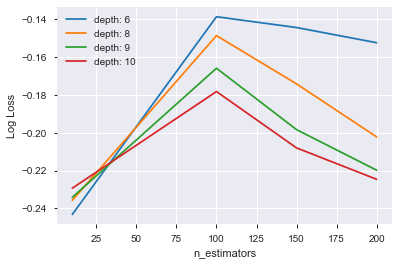

In [1341]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier()

n_estimators = [ 10,100,150, 200]
max_depth = [ 6, 8,9,10]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train1,y_train1)


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

# Testing Diffrent Algorithms and evaluating the Results

In [131]:
y = data_test1.BAD
X = data_test1.drop('BAD', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, random_state = 122)

pipelines = {
    'XGB': make_pipeline(StandardScaler(),XGBClassifier()),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

l2_hyperparams = {
    'logisticregression__C': np.linspace(1e-3, 1e3, 10)
}

rf_hyperparams = {
    'randomforestclassifier__n_estimators': [100, 200],
    'randomforestclassifier__max_features': ['auto', 'sqrt', .33]
}

gb_hyperparams = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__learning_rate': [.05, .1, .2], 
    'gradientboostingclassifier__max_depth': [3, 6, 10]
}

XGB_hyperparams = {
}

hyperparameters = {
    'l2': l2_hyperparams,
    'rf': rf_hyperparams,
    'gb': gb_hyperparams,
    'XGB': XGB_hyperparams
}

In [120]:
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv = 10, n_jobs = -1)
    
    # Fit model on X_train, y_train
    model.fit(X = X_train, y = y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print('{} has been fitted'.format(name))

XGB has been fitted


/Users/devon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


l2 has been fitted
rf has been fitted
gb has been fitted


In [121]:
for model in fitted_models: 
    print(model, fitted_models[model].best_score_)

XGB 0.9493952110589978
l2 0.8590471488521353
rf 0.9577882004443348
gb 0.9597630214761788


In [122]:
for model in fitted_models:
    #create class probabilities
    pred = fitted_models[model].predict_proba(X_test)
    pred = [Class[1] for Class in pred]
    
    #create fpr, tpr, thresholds
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    
    #calculate auc
    mod_auc = auc(fpr, tpr)
    print(model, mod_auc)
    
print('\n')    
for model in fitted_models: 
    print(model, fitted_models[model].best_score_)

XGB 0.9697531545451201
l2 0.8514439171541037
rf 0.9891494684177612
gb 0.9885590258617519


XGB 0.9493952110589978
l2 0.8590471488521353
rf 0.9577882004443348
gb 0.9597630214761788


In [123]:
acc = []
for model in fitted_models:
    acc.append(accuracy_score(y_test, fitted_models[model].predict(X_test)))
    print(model, accuracy_score(y_test, fitted_models[model].predict(X_test)))

XGB 0.9622501850481125
l2 0.8778682457438934
rf 0.9733530717986677
gb 0.9703923019985197


In [124]:
rec = []
for model in fitted_models:
    rec.append(recall_score(y_test, fitted_models[model].predict(X_test)))
    print(model, recall_score(y_test, fitted_models[model].predict(X_test)))

XGB 0.8170731707317073
l2 0.524390243902439
rf 0.8536585365853658
gb 0.8699186991869918


In [125]:
prec = []
for model in fitted_models: 
    prec.append(precision_score(y_test, fitted_models[model].predict(X_test)))
    print(model, precision_score(y_test, fitted_models[model].predict(X_test)))

XGB 0.9710144927536232
l2 0.7288135593220338
rf 1.0
gb 0.963963963963964


In [126]:
from sklearn.metrics import f1_score
f = []
for model in fitted_models: 
    f.append(f1_score(y_test, fitted_models[model].predict(X_test)))
    print(model, f1_score(y_test, fitted_models[model].predict(X_test)))

XGB 0.8874172185430462
l2 0.6099290780141844
rf 0.9210526315789475
gb 0.9145299145299145


In [127]:

len(acc)

4

In [129]:
models = pd.DataFrame({
    'Accuracy Score': acc,
    'Recall Score' : rec,
    'F1 Score' : f,
    'Precision Score' : prec
})
models.index = ['Logistic Regression', 'Random Forest','Gradient Boosting Classifier', 'XGB']
models

,Accuracy Score,Recall Score,F1 Score,Precision Score
Logistic Regression,0.962250,0.817073,0.887417,0.971014
Random Forest,0.877868,0.524390,0.609929,0.728814
Gradient Boosting Classifier,0.973353,0.853659,0.921053,1.000000
XGB,0.970392,0.869919,0.914530,0.963964


# Model Tuning/Selection

Model Tuning/Selection
As showed earlier, the default rate from the entire dataset is ~20%, so if the model simply predicted 0 (no default), the accuracy would be ~80%. Thus we must look at precision and recall. If this model was actually used to predict whether or not a loan would default, it would be very worthwhile to correctly identify those who would default as money would be saved, while it wouldn't be detrimental to reject a good loan as there is a large pool of loan applicants. Essentially, the money used to give out loans is much more limited than the pool of applicants, and thus recall is a more important metric than precision; however, a good balance is ideal as we do not want to reject a slew of good loans. Thus we will also consider the F1 score to evaluate if a good balance is met.

##### Looking at the reXGB performing comparably. The GBC had the highest accuracy of ~94%, highest recall of 
##### ~75%, highest F1 score of ~84%, and the highest precision of ~97%.

##### The GBC has a 3% false positive rate, meaning it will correctly mark a Loan as defaulting 97% of the time. The F1 score is ~92%, showing a good balance of recall and precision.

# CONCLUSION

Conclusions
The most balanced, overall best performing model in my opinion was the Random Forest model created with oversampled training data. This model had the highest F1 score of ~88%, showing a great balance of precision and recall, and also the highest overall accuracy of ~96%. It correctly identifies ~85% of bad loans as bad and only ~9% of loans identified as bad are actually good.

The model to choose, however, is based on the priorities of the bank giving out the loans. Imagine that a bank has a plethora of loan applications a day, but it has an extremely low risk tolerance. This means the bank must correctly identify the highest number of bad loans without any concern of rejecting too many good loans because new applicants are always around the corner. In this context, the Random Forest created with undersampled training data would be the best choice as it has a recall score of ~90%, meaning it finds ~5% more of the bad loans compared to the Random Forest created with oversampled training data, even though ~34% of loans identified as bad are actually good.